# Used Car Price Prediction Project

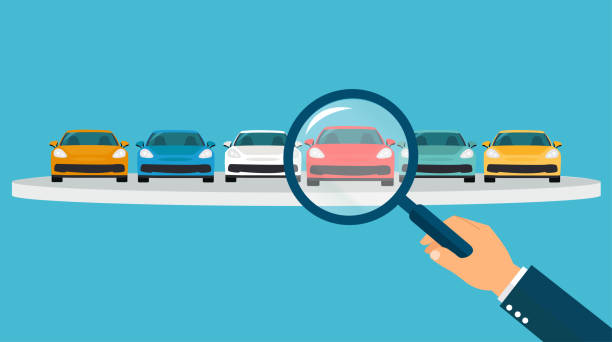

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

This project contains two phase :

* Data Collection Phase: You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model. In this section you need to scrape the data of used cars from websites (Olx, Cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example - SUV, Sedans, Coupe, Minivan, Hatchback.

* Model Building Phase: After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the below steps.

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [33]:
# importing required libraries

import pandas as pd    # Data Manipulation and exploring
import numpy as np     # Data Statistical Analysis 
import seaborn as sns  # Statistical Data Visualization
import matplotlib.pyplot as plt  # Data Visualization
%matplotlib inline

import warnings  # to ignore warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#to save model
import joblib  

In [34]:
#importing dataset

df = pd.read_csv(r"../Car Price Prediction/used_cars.csv", )

In [35]:
#checking df data
df

LOCATION  MNF_YEAR                    BRAND  \
0                   New Delhi      2018                  Hyundai   
1                   New Delhi      2016                   Maruti   
2                   New Delhi      2018                   Maruti   
3                   New Delhi      2020                  Hyundai   
4                   New Delhi      2017                   Toyota   
...                       ...       ...                      ...   
7681  Rohini Sector 14, Delhi      2010                 Hyundai    
7682  Rohini Sector 14, Delhi      2014                 Hyundai    
7683       Thrikkakara, Kochi      2019  Mercedes Benz Fortuner    
7684     Nana Varachha, Surat      2013                 Hyundai    
7685     Nana Varachha, Surat      2012                  Maruti    

                                      MODEL    VARIANT   DRIVEN_KM  \
0                        Creta 1.6 E + VTVT     Manual   39,294 km   
1                         Vitara Brezza ZDI     Manual   92,569 km   
2                     Vitara Brezza VDI OPT     Manual   60,395 km   
3                      VENUE S MT 1.2 KAPPA     Manual    3,393 km   
4     Innova Crysta Touring Sport Diesel AT  Automatic   85,295 km   
...                                     ...        ...         ...   
7681                          Executive CNG     MANUAL  80000.0 KM   
7682                                  Magna     MANUAL  34000.0 KM   
7683                      3.0 4x4 Automatic  AUTOMATIC  70000.0 KM   
7684                          Diesel Sportz     MANUAL  58250.0 KM   
7685                               DDiS VDI     MANUAL  58250.0 KM   

           FUELTYPE NOOF_OWNERS       PRICE  
0            Petrol   2nd Owner   ₹8,98,799  
1            Diesel   1st Owner   ₹6,69,099  
2            Diesel   1st Owner   ₹6,83,399  
3            Petrol   1st Owner   ₹6,78,199  
4            Diesel   1st Owner  ₹15,00,699  
...             ...         ...         ...  
7681  CNG & HYBRIDS         1st    2,10,000  
7682         PETROL         1st    3,10,000  
7683         DIESEL         1st   36,50,000  
7684         DIESEL         2nd    3,51,000  
7685         DIESEL         2nd    3,25,000  

[7686 rows x 9 columns]

In [36]:
df.head()

LOCATION  MNF_YEAR    BRAND                                  MODEL  \
0  New Delhi      2018  Hyundai                     Creta 1.6 E + VTVT   
1  New Delhi      2016   Maruti                      Vitara Brezza ZDI   
2  New Delhi      2018   Maruti                  Vitara Brezza VDI OPT   
3  New Delhi      2020  Hyundai                   VENUE S MT 1.2 KAPPA   
4  New Delhi      2017   Toyota  Innova Crysta Touring Sport Diesel AT   

     VARIANT  DRIVEN_KM FUELTYPE NOOF_OWNERS       PRICE  
0     Manual  39,294 km   Petrol   2nd Owner   ₹8,98,799  
1     Manual  92,569 km   Diesel   1st Owner   ₹6,69,099  
2     Manual  60,395 km   Diesel   1st Owner   ₹6,83,399  
3     Manual   3,393 km   Petrol   1st Owner   ₹6,78,199  
4  Automatic  85,295 km   Diesel   1st Owner  ₹15,00,699

In [37]:
#droping unwanted columns

df.drop(columns=['MODEL', 'NOOF_OWNERS', 'LOCATION'], axis=1, inplace = True)

In [99]:
#checking data

df

MNF_YEAR  BRAND  VARIANT  DRIVEN_KM  FUELTYPE    PRICE
0         2018   37.0      1.0      39294       5.0   898799
1         2016   50.0      1.0      92569       2.0   669099
2         2018   50.0      1.0      60395       2.0   683399
3         2020   37.0      1.0       3393       5.0   678199
4         2017   93.0      0.0      85295       2.0  1500699
...        ...    ...      ...        ...       ...      ...
7680      2014   70.0      1.0     175000       2.0   900000
7681      2010   38.0      1.0      80000       1.0   210000
7682      2014   38.0      1.0      34000       5.0   310000
7684      2013   38.0      1.0      58250       2.0   351000
7685      2012   51.0      1.0      58250       2.0   325000

[7338 rows x 6 columns]

* We can see that the first five and last five rows of the data.
* In the data We can see total no of rows: 7338 and columns: 6.
* Here we can see the target column is PRICE.
* Price is a continous values it makes this to be regression problem.

# EDA

In [39]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 7686 Rows and 6 Columns in our dataframe


In [40]:
df.head()

MNF_YEAR    BRAND    VARIANT  DRIVEN_KM FUELTYPE       PRICE
0      2018  Hyundai     Manual  39,294 km   Petrol   ₹8,98,799
1      2016   Maruti     Manual  92,569 km   Diesel   ₹6,69,099
2      2018   Maruti     Manual  60,395 km   Diesel   ₹6,83,399
3      2020  Hyundai     Manual   3,393 km   Petrol   ₹6,78,199
4      2017   Toyota  Automatic  85,295 km   Diesel  ₹15,00,699

Column Description:

* MNF_YEAR - Gives us the year in which the car was made.
* BRAND- This shows the car manufacture name & model.
* VARIANT - Gives us the manual or automatic gear shifting mechanism.
* DRIVEN_KM - Number of kilometers the car the driven reflecting on the Odometer.
* FUELTYPE - Shows the fuel type used by the vehicle.
* PRICE - Lists the selling price of the used cars

In [41]:
# Cheking for null values

df.isnull().sum()

MNF_YEAR      0
BRAND         0
VARIANT      57
DRIVEN_KM     0
FUELTYPE      0
PRICE         0
dtype: int64

In [42]:
# droping all null values from whole data
df = df.dropna(axis = 0)

In [43]:
# checking again null values

df.isnull().sum()

MNF_YEAR     0
BRAND        0
VARIANT      0
DRIVEN_KM    0
FUELTYPE     0
PRICE        0
dtype: int64

We won't have to worry about missing data because we don't have any missing values. We do, however, have records with a "-" in them that will need to be resolved.

<AxesSubplot:>

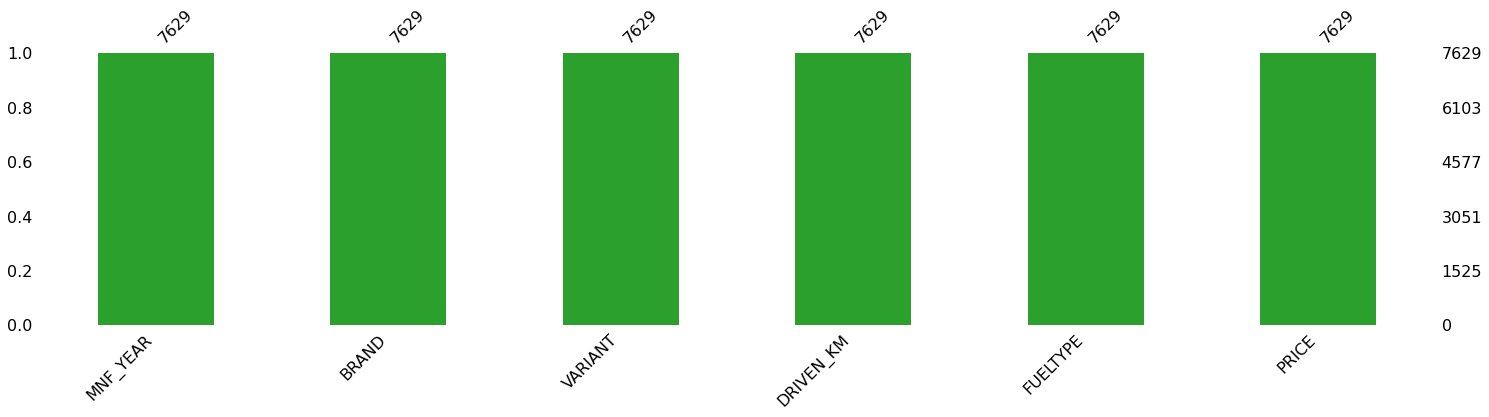

In [44]:
# Visualizing the missing data

missingno.bar(df, figsize = (25,5), color="tab:green")

In [45]:
print("Missing column values in percentage:")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 6)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
MNF_YEAR : 0.0 %
BRAND : 0.0 %
VARIANT : 0.0 %
DRIVEN_KM : 0.0 %
FUELTYPE : 0.0 %
PRICE : 0.0 %


In [46]:
# checking info to know non-null, count & datatype information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 7685
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MNF_YEAR   7629 non-null   int64 
 1   BRAND      7629 non-null   object
 2   VARIANT    7629 non-null   object
 3   DRIVEN_KM  7629 non-null   object
 4   FUELTYPE   7629 non-null   object
 5   PRICE      7629 non-null   object
dtypes: int64(1), object(5)
memory usage: 417.2+ KB


Since all six columns except MNF_YEAR are displaying as object datatypes, some data cleaning is needed to fix those details.

In [47]:
# checking unique values
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
VARIANT                5
FUELTYPE              11
MNF_YEAR              29
BRAND                102
PRICE               1582
DRIVEN_KM           1790

In [48]:
#Data pre-processing

df["PRICE"]=df["PRICE"].apply(lambda x: x.replace('₹','') if x!='' else '')

df["DRIVEN_KM"]=df["DRIVEN_KM"].apply(lambda x: x.replace('.0','') if x!='' else '')
df["DRIVEN_KM"]=df["DRIVEN_KM"].apply(lambda x: x.replace('KM','') if x!='' else '')
df["DRIVEN_KM"]=df["DRIVEN_KM"].apply(lambda x: x.replace('km','') if x!='' else '')
df["DRIVEN_KM"]=df["DRIVEN_KM"].apply(lambda x: x.replace(',', ''))

df

MNF_YEAR                    BRAND    VARIANT DRIVEN_KM       FUELTYPE  \
0         2018                  Hyundai     Manual    39294          Petrol   
1         2016                   Maruti     Manual    92569          Diesel   
2         2018                   Maruti     Manual    60395          Diesel   
3         2020                  Hyundai     Manual     3393          Petrol   
4         2017                   Toyota  Automatic    85295          Diesel   
...        ...                      ...        ...       ...            ...   
7681      2010                 Hyundai      MANUAL    80000   CNG & HYBRIDS   
7682      2014                 Hyundai      MANUAL    34000          PETROL   
7683      2019  Mercedes Benz Fortuner   AUTOMATIC    70000          DIESEL   
7684      2013                 Hyundai      MANUAL    58250          DIESEL   
7685      2012                  Maruti      MANUAL    58250          DIESEL   

          PRICE  
0      8,98,799  
1      6,69,099  
2      6,83,399  
3      6,78,199  
4     15,00,699  
...         ...  
7681   2,10,000  
7682   3,10,000  
7683  36,50,000  
7684   3,51,000  
7685   3,25,000  

[7629 rows x 6 columns]

In [49]:
# converting PRICE column - object datatype into float datatype
try:
    df["PRICE"]=df["PRICE"].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

try:
    df["PRICE"]=df["PRICE"].apply(lambda x: str(x.replace(',', ''))) #replacing ',' with '' no space in price column
except ValueError:
    pass

df["PRICE"]=df["PRICE"].str.strip() # removing extra white space from the column records
df["PRICE"]=pd.to_numeric(df["PRICE"].str.replace('-','0'), errors='coerce')
df["PRICE"]=df["PRICE"].astype(float) # converting object to float data type
df

MNF_YEAR                    BRAND    VARIANT DRIVEN_KM       FUELTYPE  \
0         2018                  Hyundai     Manual    39294          Petrol   
1         2016                   Maruti     Manual    92569          Diesel   
2         2018                   Maruti     Manual    60395          Diesel   
3         2020                  Hyundai     Manual     3393          Petrol   
4         2017                   Toyota  Automatic    85295          Diesel   
...        ...                      ...        ...       ...            ...   
7681      2010                 Hyundai      MANUAL    80000   CNG & HYBRIDS   
7682      2014                 Hyundai      MANUAL    34000          PETROL   
7683      2019  Mercedes Benz Fortuner   AUTOMATIC    70000          DIESEL   
7684      2013                 Hyundai      MANUAL    58250          DIESEL   
7685      2012                  Maruti      MANUAL    58250          DIESEL   

          PRICE  
0      898799.0  
1      669099.0  
2      683399.0  
3      678199.0  
4     1500699.0  
...         ...  
7681   210000.0  
7682   310000.0  
7683  3650000.0  
7684   351000.0  
7685   325000.0  

[7629 rows x 6 columns]

In [50]:
# converting MNF_YEAR column object datatype to int
df['MNF_YEAR'] = df['MNF_YEAR'].astype(int)

In [51]:
# converting DRIVEN_KM column object datatype to int
df['DRIVEN_KM'] = df['DRIVEN_KM'].astype(int)

In [52]:
# replacing values

df["FUELTYPE"]=df["FUELTYPE"].apply(lambda x: x if x!='--' else 'Petrol') # replacing with common fuel type in india
df["FUELTYPE"]=df["FUELTYPE"].apply(lambda x: x if x!='PETROL' else 'Petrol') # replacing PETROL to Petrol.
df["FUELTYPE"]=df["FUELTYPE"].apply(lambda x: x if x!='DIESEL' else 'Diesel') # replacing DIESEL to Diesel.


df["VARIANT"]=df["VARIANT"].apply(lambda x: x if x!='--' else 'Manual') # common Variant is manual
df["VARIANT"]=df["VARIANT"].apply(lambda x: x if x!='MANUAL' else 'Manual') 
df["VARIANT"]=df["VARIANT"].apply(lambda x: x if x!='PETROL' else 'Petrol') 
df["VARIANT"]=df["VARIANT"].apply(lambda x: x if x!='AUTOMATIC' else 'Automatic') 
df["BRAND"]=df["BRAND"].apply(lambda x: x if x!='--' else 'Hyundai') # common used car model

df["DRIVEN_KM"]=df["DRIVEN_KM"].apply(lambda x: x if x!='--' else 'None') 

avg_usedcar_price=df["PRICE"].mean()
df["PRICE"]=df["PRICE"].apply(lambda x: x if x!='--' else avg_usedcar_price) # average used car prices

df

MNF_YEAR                    BRAND    VARIANT  DRIVEN_KM       FUELTYPE  \
0         2018                  Hyundai     Manual      39294         Petrol   
1         2016                   Maruti     Manual      92569         Diesel   
2         2018                   Maruti     Manual      60395         Diesel   
3         2020                  Hyundai     Manual       3393         Petrol   
4         2017                   Toyota  Automatic      85295         Diesel   
...        ...                      ...        ...        ...            ...   
7681      2010                 Hyundai      Manual      80000  CNG & HYBRIDS   
7682      2014                 Hyundai      Manual      34000         Petrol   
7683      2019  Mercedes Benz Fortuner   Automatic      70000         Diesel   
7684      2013                 Hyundai      Manual      58250         Diesel   
7685      2012                  Maruti      Manual      58250         Diesel   

          PRICE  
0      898799.0  
1      669099.0  
2      683399.0  
3      678199.0  
4     1500699.0  
...         ...  
7681   210000.0  
7682   310000.0  
7683  3650000.0  
7684   351000.0  
7685   325000.0  

[7629 rows x 6 columns]

In [53]:
df['PRICE'] = df['PRICE'].astype(int)
df['DRIVEN_KM'] = df['DRIVEN_KM'].astype(int)

In [54]:
# A lot of "-" data that wasn't recorded during the web scraping process so, checking for the reduction in unique values
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
VARIANT                2
FUELTYPE               8
MNF_YEAR              29
BRAND                102
PRICE               1575
DRIVEN_KM           1704

In [55]:
value = ["VARIANT", "FUELTYPE", "MNF_YEAR"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*45)

VARIANT
Manual       6440
Automatic    1189
Name: VARIANT, dtype: int64
FUELTYPE
Petrol           4076
Diesel           3153
CNG & HYBRIDS     280
CNG                60
Petrol + CNG       40
LPG                18
Petrol + LPG        1
ELECTRIC            1
Name: FUELTYPE, dtype: int64
MNF_YEAR
2017    947
2018    793
2016    760
2019    647
2015    622
2012    556
2014    529
2011    439
2008    427
2013    412
2020    352
2009    269
2010    248
2007    167
2006    153
2021     91
2005     60
2002     56
2004     43
2000     32
2001      7
1986      5
1999      3
1994      3
1996      2
2003      2
1975      2
1998      1
1995      1
Name: MNF_YEAR, dtype: int64


In [56]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 7685
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MNF_YEAR   7629 non-null   int64 
 1   BRAND      7629 non-null   object
 2   VARIANT    7629 non-null   object
 3   DRIVEN_KM  7629 non-null   int64 
 4   FUELTYPE   7629 non-null   object
 5   PRICE      7629 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 417.2+ KB


we can see that there are 2 int64, 3 object data type columns

In [57]:
#checking describe
df.describe(include="all")

MNF_YEAR   BRAND VARIANT      DRIVEN_KM FUELTYPE         PRICE
count   7629.000000    7629    7629    7629.000000     7629  7.629000e+03
unique          NaN     102       2            NaN        8           NaN
top             NaN  Maruti  Manual            NaN   Petrol           NaN
freq            NaN    1567    6440            NaN     4076           NaN
mean    2014.184690     NaN     NaN   61806.425088      NaN  5.559382e+05
std        4.338351     NaN     NaN   51342.886853      NaN  6.620734e+05
min     1975.000000     NaN     NaN       0.000000      NaN  1.500000e+04
25%     2011.000000     NaN     NaN   25490.000000      NaN  2.400000e+05
50%     2015.000000     NaN     NaN   56000.000000      NaN  4.200000e+05
75%     2017.000000     NaN     NaN   85000.000000      NaN  6.649990e+05
max     2021.000000     NaN     NaN  950866.000000      NaN  8.500000e+06

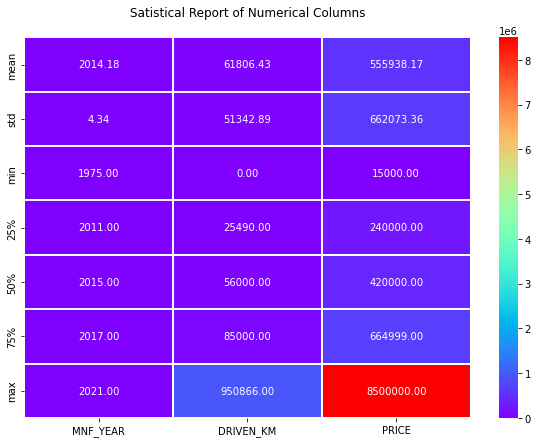

In [58]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="rainbow")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In the visual representation we have taken into consideration only the numeric data part and can see that the only abnormality is used car maximum price which is higher than all the other values.

# Visualization

In [59]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

pandas-profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what pandas-profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

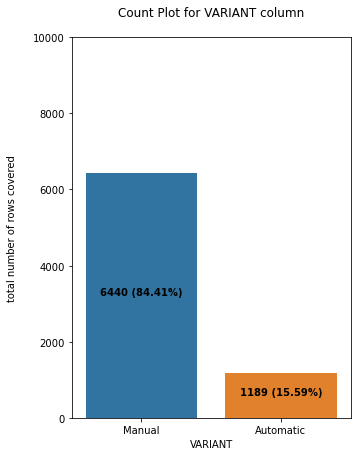

In [60]:
try:
    x = 'VARIANT'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,10000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

* Observation: 

We can observe that there are more manual used cars available on the market than automated gear shifting ones. The difference is significant, and many widely accessible, well-maintained old automobiles provide manual gear changing.

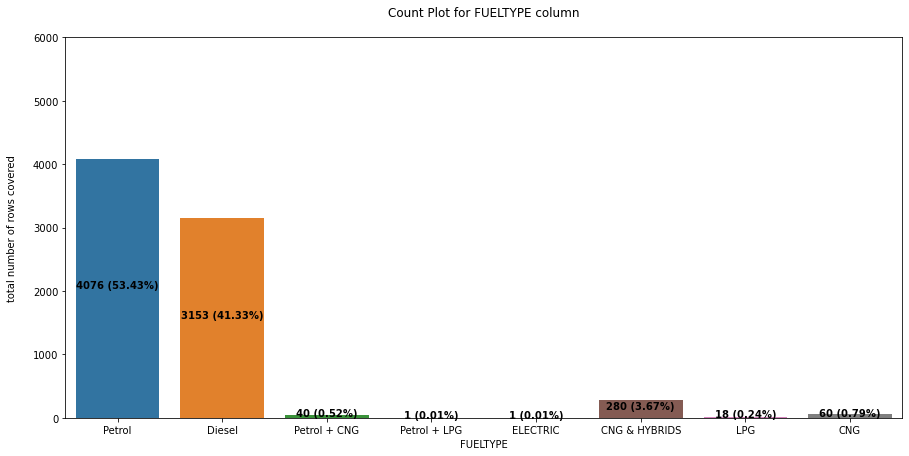

In [61]:
try:
    x = 'FUELTYPE'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,6000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

* Observation: 

In India most of the cars use petrol & diesel engines and the same is being reflected above. Most of the used cars run either on petrol or diesel. We do have a minimal amount of cars that run on Electric, LPG, CNG and their hybrid versions.

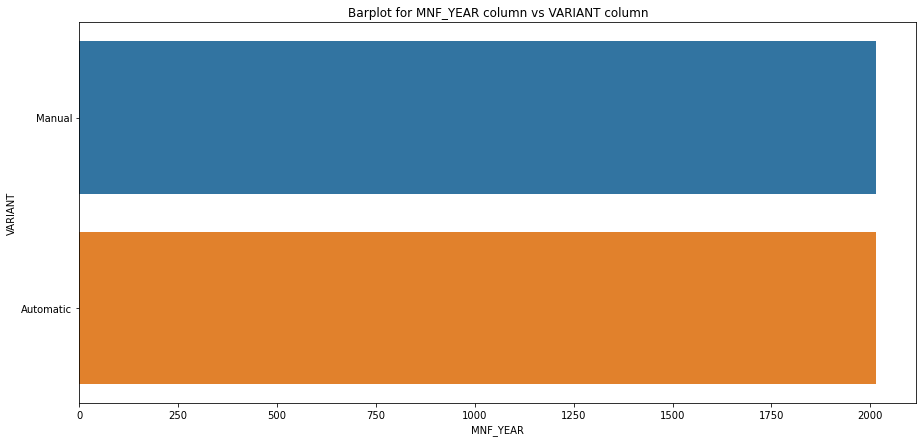

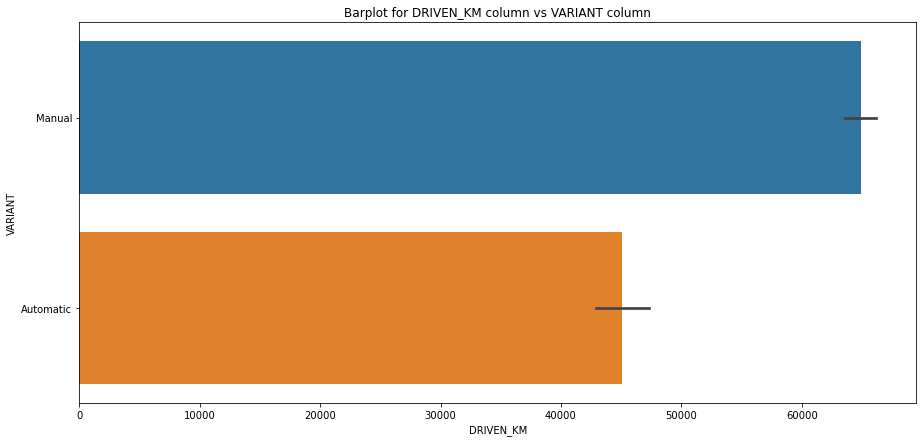

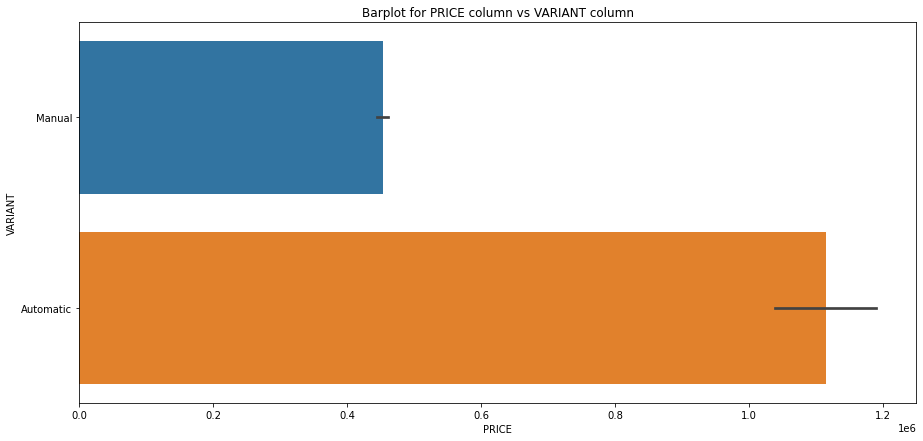

In [62]:
y = 'VARIANT'

x = 'MNF_YEAR'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'DRIVEN_KM'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'PRICE'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

* Observation:

* MNF_YEAR for both manual and automatic gear shifting cars are same
* DRIVEN_KM for manual cars are more than that of their automatic counterparts
* PRICE for automatic one's are way higher than the manual cars

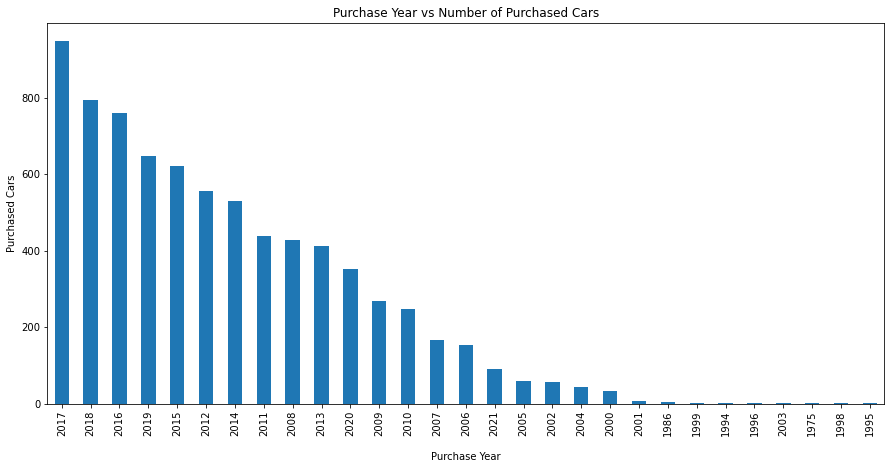

In [63]:
plt.figure(figsize=[15,7])
purchased_car_per_year = df['MNF_YEAR'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("\nPurchase Year")
plt.ylabel("Purchased Cars")
plt.title("Purchase Year vs Number of Purchased Cars")
plt.show()

* Observation: 

The number of cars being purchased each year has increased a lot after 2008. Most of the people started preferring to get used cars and all the available online sources helped in expediting genuine process of getting good quality used cars with hassle free Registration Certificate (RC) transfers.

Pair Plot with Transmission Type legend


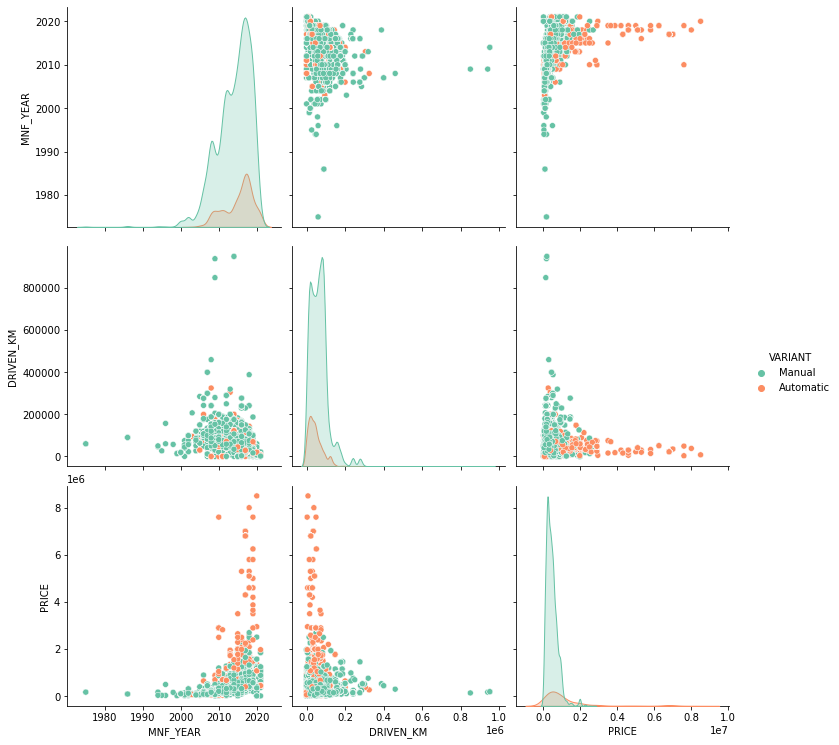

Pair Plot with Fuel Type legend


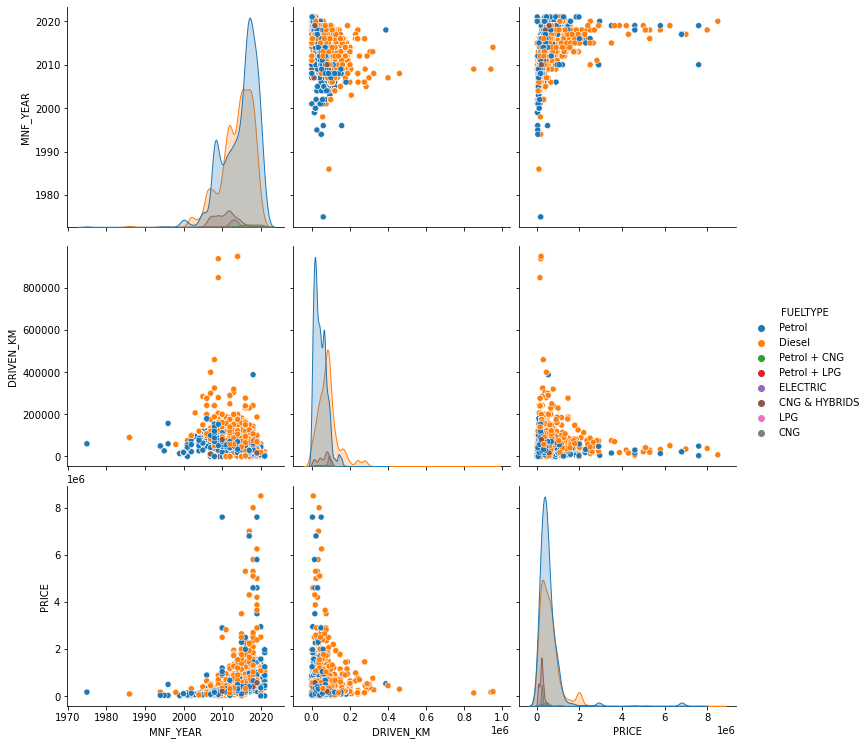

In [64]:
print("Pair Plot with Transmission Type legend")
sns.pairplot(df, hue='VARIANT', diag_kind="kde", kind="scatter", palette="Set2", height=3.5)
plt.show()
print("Pair Plot with Fuel Type legend")
sns.pairplot(df, hue='FUELTYPE', diag_kind="kde", kind="scatter", palette="tab10", height=3.5)
plt.show()

Observation: Above we have generated the pairplots for VARIENT and FUELTYPE legends on our numeric data.

Manual VARIANT used car fuel details


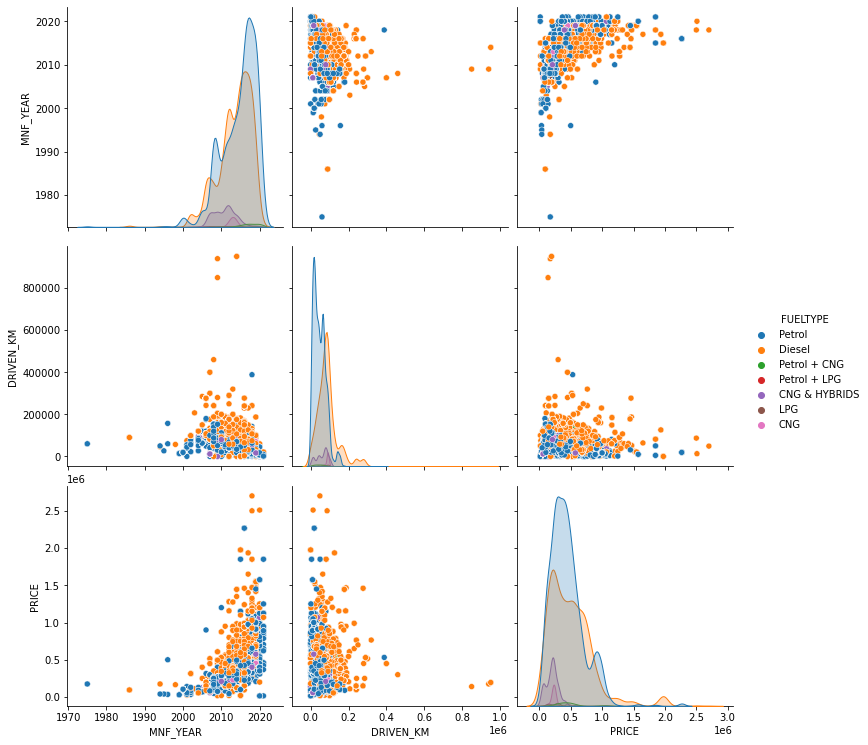

Automatic VARIANT used car fuel details


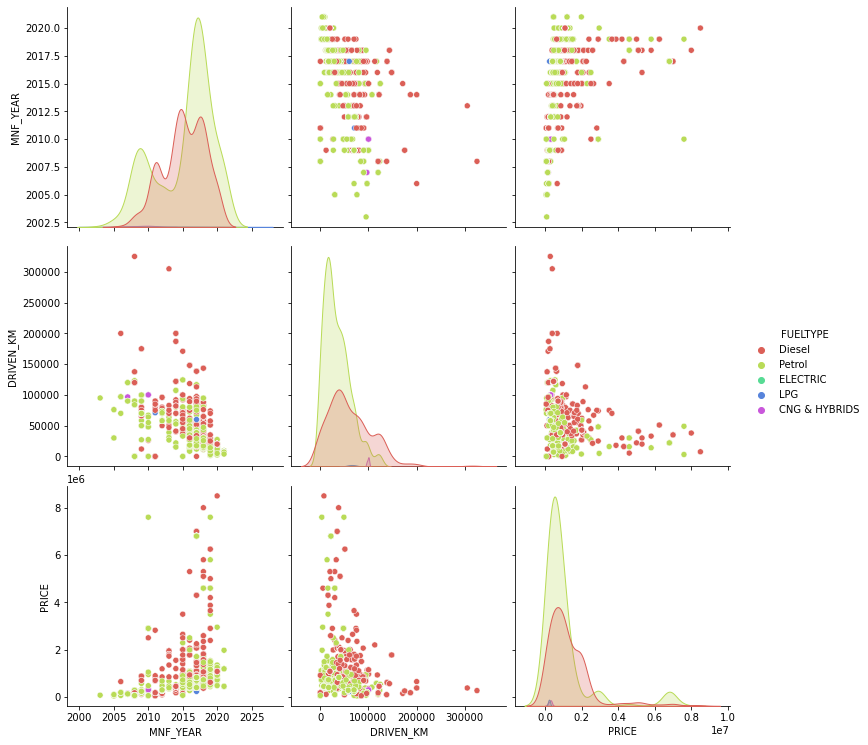

In [65]:
Manual = df[df['VARIANT']=='Manual']
Automatic = df[df['VARIANT']=='Automatic']

print('Manual VARIANT used car fuel details')
sns.pairplot(Manual, hue='FUELTYPE', diag_kind="kde", kind="scatter", palette="tab10", height=3.5)
plt.show()

print('Automatic VARIANT used car fuel details')
sns.pairplot(Automatic, hue='FUELTYPE', diag_kind="kde", kind="scatter", palette="hls", height=3.5)
plt.show()

Observation: Above we have generated pair plots for FUELTYPE legends considering the manual and automatic transmission types.

## Encoding the categorical object datatype columns

In [66]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["VARIANT", "FUELTYPE", "BRAND"]
df=ordinal_encode(df, column)
df

MNF_YEAR  BRAND  VARIANT  DRIVEN_KM  FUELTYPE    PRICE
0         2018   37.0      1.0      39294       5.0   898799
1         2016   50.0      1.0      92569       2.0   669099
2         2018   50.0      1.0      60395       2.0   683399
3         2020   37.0      1.0       3393       5.0   678199
4         2017   93.0      0.0      85295       2.0  1500699
...        ...    ...      ...        ...       ...      ...
7681      2010   38.0      1.0      80000       1.0   210000
7682      2014   38.0      1.0      34000       5.0   310000
7683      2019   69.0      0.0      70000       2.0  3650000
7684      2013   38.0      1.0      58250       2.0   351000
7685      2012   51.0      1.0      58250       2.0   325000

[7629 rows x 6 columns]

To convert the object datatype columns to numeric format, I wrote a method to apply OrdinalEncoder to my feature columns.

In [67]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame post encoding shows 7629 Rows and 6 columns



After applying the encoding technique to them, check the number of rows and columns.

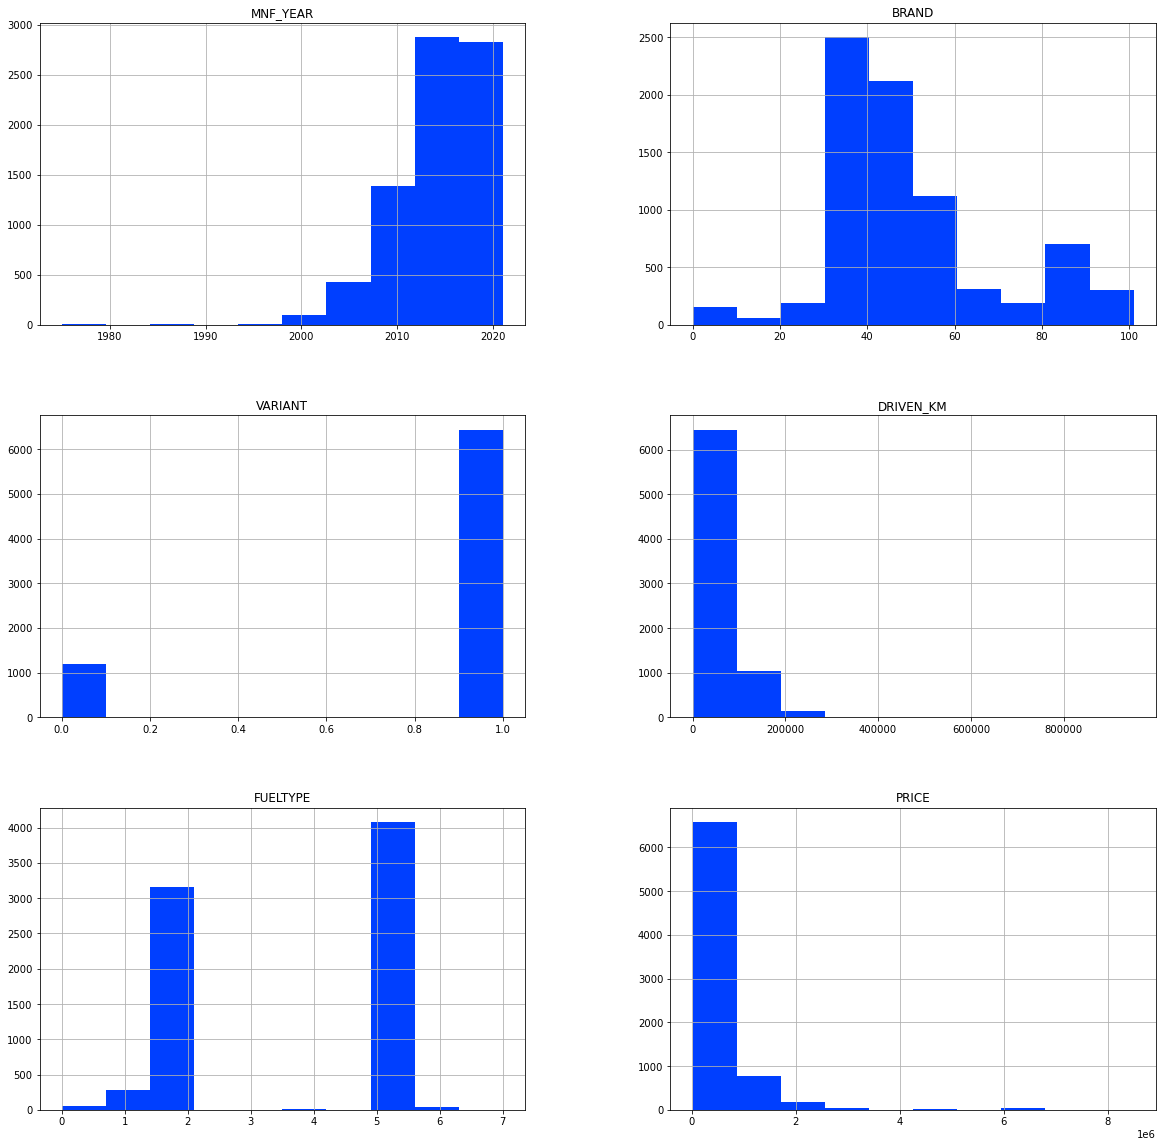

In [68]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

We can see the data distribution for our dataset columns with the aid of the above histogram.

# Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

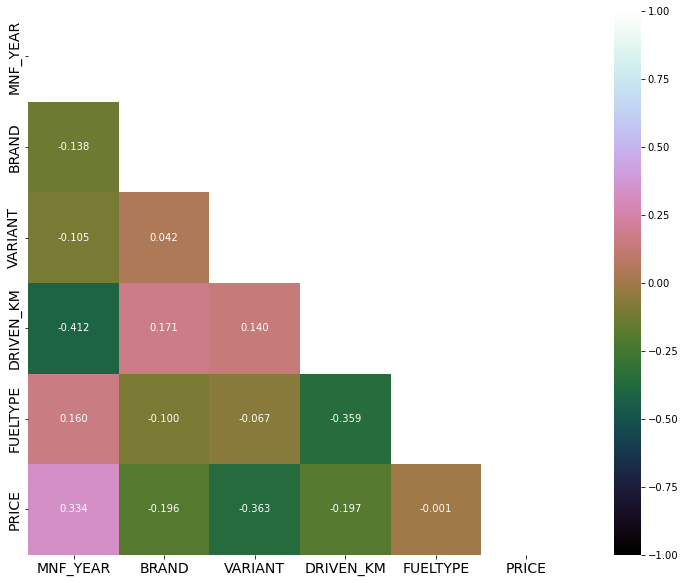

In [69]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Correlation Bar Plot comparing Gender column with the remaining columns

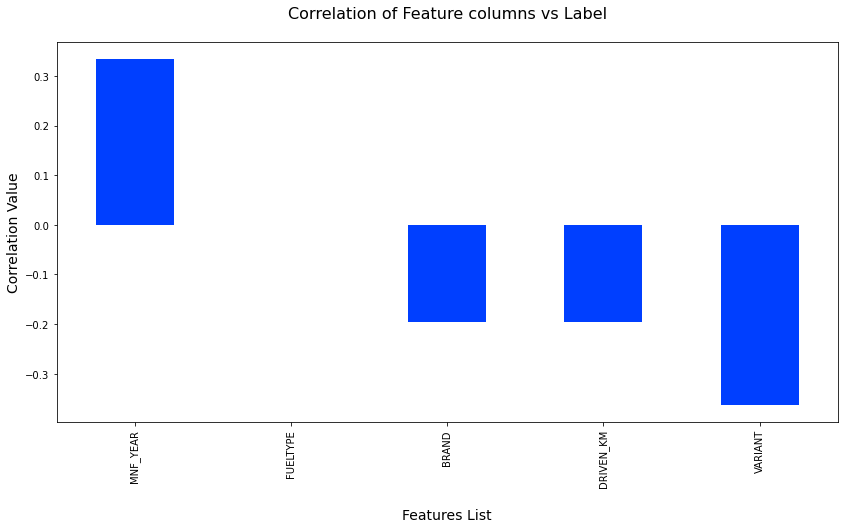

In [70]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['PRICE'].sort_values(ascending=False).drop('PRICE').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

Here we have a visual on the positively and negatively correlated feature columns with the target variable.

# Outliers

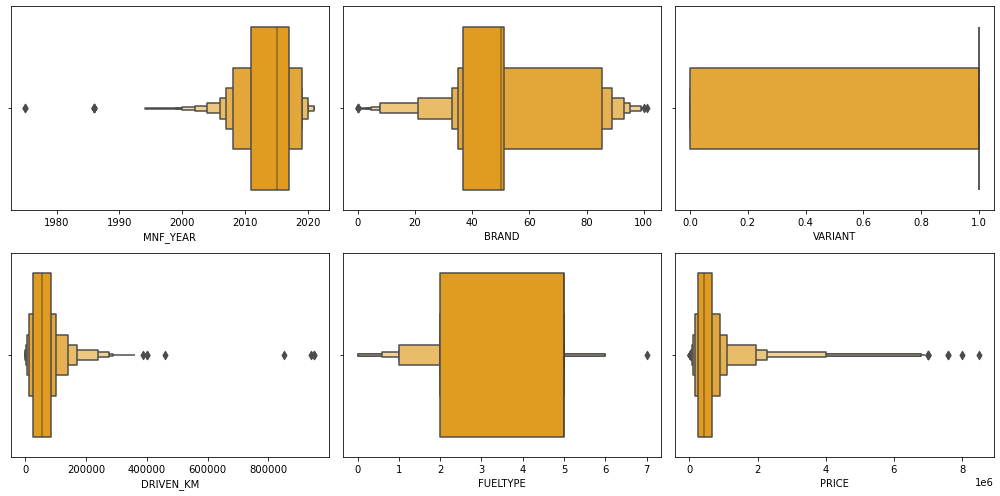

In [71]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='orange')
    plt.tight_layout()

We can see that there are few outliers present in our dataset that will need to be treated.

In [72]:
# Using Z Score to remove outliers

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7629, 6)
Shape of the dataframe after removing outliers:  (7338, 6)
Percentage of data loss post outlier removal:  3.814392449862367


I utilised the Z Score approach to eliminate outliers from our dataset, and the data loss rate was less than 5%.

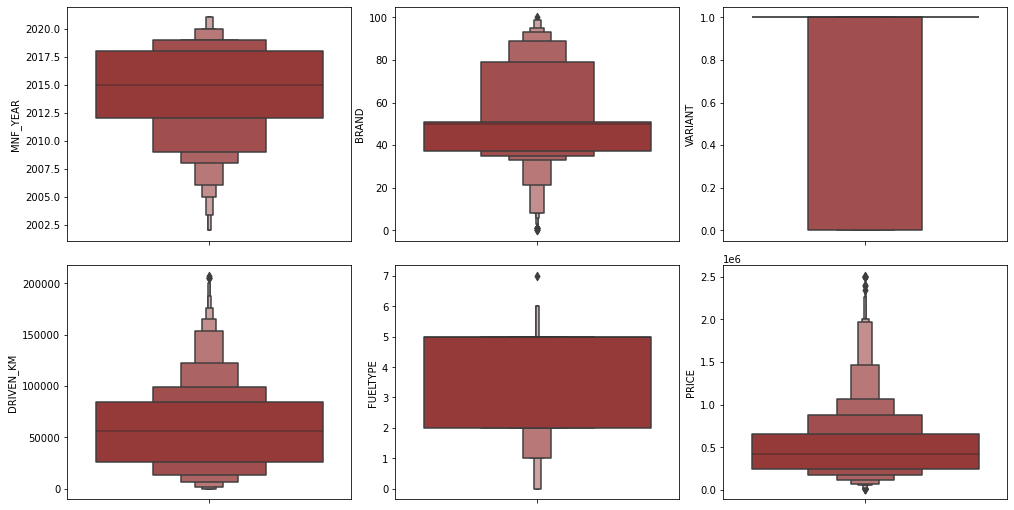

In [73]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="brown")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We can confirm that our dataset's outlier problem has been effectively addressed.

# Skewness

In [74]:
df.skew()

MNF_YEAR    -0.641130
BRAND        0.898297
VARIANT     -1.986030
DRIVEN_KM    0.743148
FUELTYPE    -0.274768
PRICE        1.890382
dtype: float64

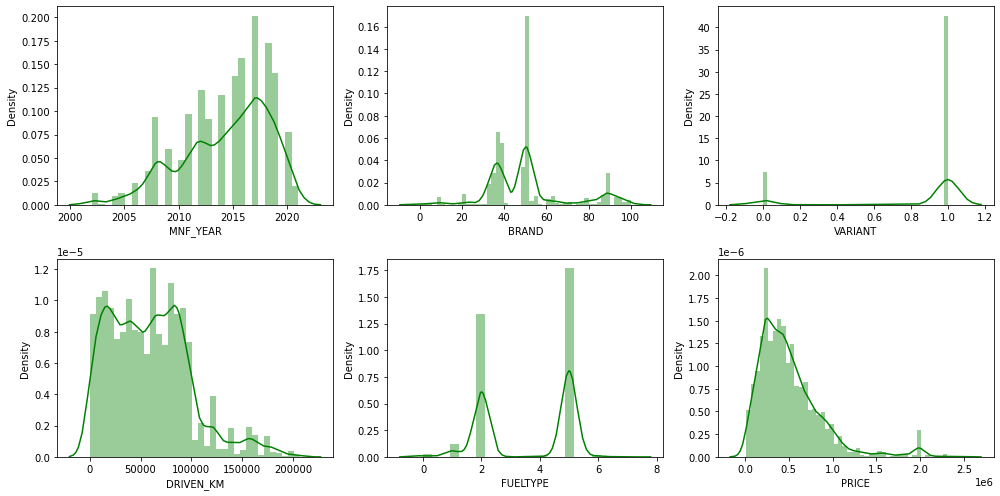

In [75]:
plt.figure(figsize=(14,7))
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.distplot(df[outl_df[i]], color='green')
    plt.tight_layout()

I note that our target column has the highest skewness, but that shouldn't be a problem for us. However, I've seen some skewness in our feature columns, which will need to be addressed.

In [76]:
# Using Log Transform to fix skewness

df_log=df.copy()
for col in df_log.columns:
    if df_log.skew().loc[col]>0.55:
        df_log[col]=np.log1p(df_log[col])

I'm utilising the log transformation method to verify that our feature variables' skewness issues are addressed.

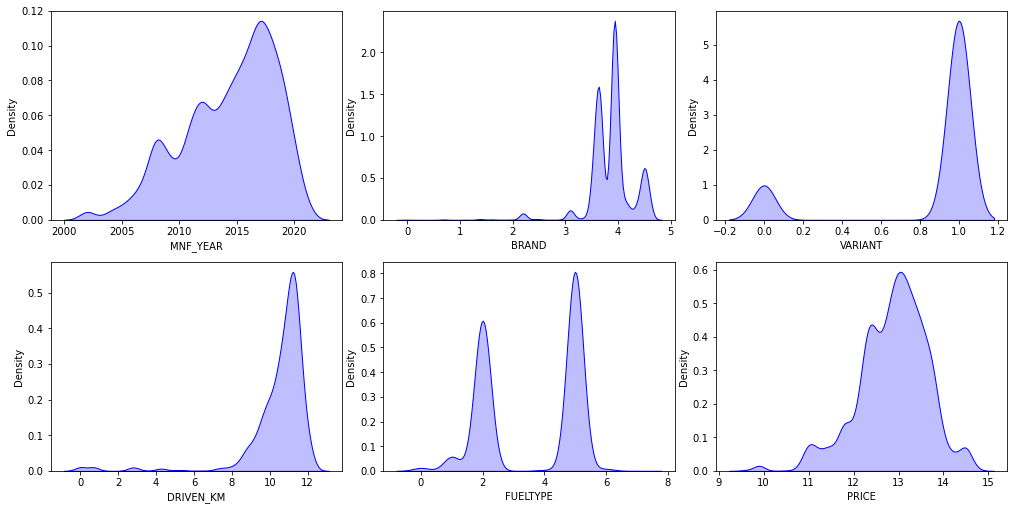

In [77]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df_log.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

I can see that virtually all of the columns now have a bell shape curve that retains the normal distribution form using the above distribution graphs.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [78]:
X = df_log.drop('PRICE', axis=1)
Y = df_log['PRICE']

I have divided the dataset into features and labels, with X standing for all feature columns and Y standing for the target label column.

# Feature Scaling

In [79]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MNF_YEAR     BRAND   VARIANT  DRIVEN_KM  FUELTYPE
0  0.902083 -0.535440  0.416328   0.065583  0.892818
1  0.406965  0.176520  0.416328   0.560948 -1.006717
2  0.902083  0.176520  0.416328   0.314070 -1.006717
3  1.397202 -0.535440  0.416328  -1.350262  0.892818
4  0.654524  1.656069 -2.401952   0.513637 -1.006717

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding the best random state for building Regression Models

In [80]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 61.678560400703375 on Random State 849


We can see that the best random state number found, out of a range of 1 to 1000, is "849," which we will utilise in our machine learning models.

# Feature importance bar graph

Importance
Features             
MNF_YEAR        0.575
BRAND           0.243
DRIVEN_KM       0.134
FUELTYPE        0.032
VARIANT         0.017

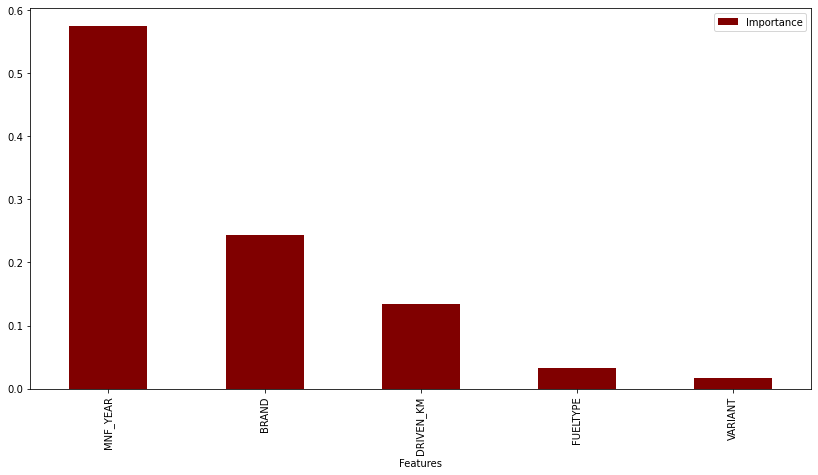

In [81]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (14,7)
importances.plot.bar(color='maroon')
importances

While predicting our label variable, the columns in the above cell are ordered in descending order according to their importance weightage.

# Machine Learning Model for Regression with Evaluation Metrics

In [82]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=251)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I created a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, creates the R2, calculates the Cross Validation score, and lastly discovers the difference between the R2 and Cross Validation scores.

In [83]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.5240734208725968
R2 Score is: 55.09064471975369
Cross Validation Score: 36.87677102301901
R2 Score - Cross Validation Score is 18.21387369673468


I built the Linear regression model and double-checked all of its assessment metrics.

In [84]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.5243642296660334
R2 Score is: 55.04079041150136
Cross Validation Score: 36.745104864619755
R2 Score - Cross Validation Score is 18.295685546881607


I built the ridge regression model and double-checked all of its assessment metrics.

In [85]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.7820632153994009
R2 Score is: -0.008351809862272574
Cross Validation Score: -60.65989900359667
R2 Score - Cross Validation Score is 60.6515471937344


I built the Lasso regression model and double-checked all of its assessment metrics.

In [86]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.5029121330440833
R2 Score is: 58.64416649097872
Cross Validation Score: -26.77354230670116
R2 Score - Cross Validation Score is 85.41770879767988


I built the Support vector regression model and double-checked all of its assessment metrics.

In [87]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.22269193998231276
R2 Score is: 91.8911073904114
Cross Validation Score: 57.83328787429928
R2 Score - Cross Validation Score is 34.057819516112126


I built the Decision tree regression model and double-checked all of its assessment metrics.

In [88]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.5748404206514257
R2 Score is: 45.96848454919663
Cross Validation Score: 18.582267453386596
R2 Score - Cross Validation Score is 27.386217095810036


I built the Random forest regression model and double-checked all of its assessment metrics.

In [89]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.5719565178071483
R2 Score is: 46.50926340404252
Cross Validation Score: 16.462790489944634
R2 Score - Cross Validation Score is 30.046472914097887


I built the K Neighbors regression model and double-checked all of its assessment metrics.

In [90]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.5456627698056432
R2 Score is: 51.314324743219
Cross Validation Score: 21.330263849641213
R2 Score - Cross Validation Score is 29.984060893577784


I built the Gradient boosting regressor regression model and double-checked all of its assessment metrics.

In [91]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.49040103916996636
R2 Score is: 60.67621480223854
Cross Validation Score: 36.20695772046822
R2 Score - Cross Validation Score is 24.469257081770323


I built the Ada boost regression model and double-checked all of its assessment metrics.

In [92]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.19535925930360767
R2 Score is: 93.75948327370935
Cross Validation Score: 71.86202215603075
R2 Score - Cross Validation Score is 21.897461117678603


I built the Extra trees regression model and double-checked all of its assessment metrics.

# Hyper parameter tuning

In [93]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 251, 340]})

In [94]:
GSCV.best_params_

{'criterion': 'mae', 'n_estimators': 200, 'n_jobs': -2, 'random_state': 340}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [95]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=300, n_jobs=-1, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 94.03342994922366


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

# Prediction of Used Car Price

In [96]:
Predicted_Price = Final_Model.predict(X)
# Reversing the Log Transformation that was performed on the Target column while training the ML Model
Predicted_SalePrice = np.exp(Predicted_Price)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Used Car Price Predicted'] = Predicted_SalePrice
predicted_output['Used Car Price Actual'] = df["PRICE"]
predicted_output

Used Car Price Predicted  Used Car Price Actual
0                 8.988000e+05               898799.0
1                 6.691000e+05               669099.0
2                 6.834000e+05               683399.0
3                 6.782000e+05               678199.0
4                 1.500700e+06              1500699.0
...                        ...                    ...
7333              9.701816e+05               975000.0
7334              2.100010e+05               450000.0
7335              3.100010e+05                20000.0
7336              3.510010e+05               240000.0
7337              2.812375e+05               150000.0

[7338 rows x 2 columns]

Here we have created a dataframe that shows us the predicted used car prices and the actual used car prices that was obtained by scraping data from the websites.

# Saving the best model

In [97]:
filename = "UsedCarPrice_Prediction.pkl"
joblib.dump(Final_Model, filename)

['UsedCarPrice_Prediction.pkl']

Finally, I am saving my best regression model using the joblib library.

# Inference:

* I gained knowledge of how to collect data, pre-process data, analyse data, and build a model after completing this assignment.


* Firstly I used Web Scraping to obtain used automobile data from several websites such as olx, cardekho, cars24, ola, and others. Beautiful Soup and Selenium were utilised for web scraping, which provides the advantage of automating our data collection process. The framework used for web scraping was Beautiful Soup and Selenium, which has an advantage of automating our process of collecting data.


* I gathered about 10,000 pieces of information, including the selling price of used autos and other relevant details.


* The scraped data was then integrated into a single data frame and stored as a csv file, which we could read and analyse.


* I cleaned the data and performed data preprocessing tasks such as discovering and handling null values, removing words from numbers, converting objects to int types, data visualisation, and handling outliers and skewness, among other things.


* I started testing multiple machine learning regression techniques to discover the best performing model after separating our train and test data.


* According to their r2 score and cross validation scores, the Extra Tree Regressor Algorithm performed well.


* Then, using GridSearchCV, we used the Hyperparameter Tuning approach to find the optimum parameters and improve the score. Although the Extra Tree Regressor Algorithm did not do as well as the defaults, we decided to keep it for future forecasts because it was still better than the rest.


* After receiving a dataframe containing anticipated and real used car price details, we stored the final model in pkl format using the joblib package.

# The problems we faced during this project were:

The website was badly constructed because scraping took a long time and getting the next page was difficult. In addition, I need more practise with various web scraping approaches. There were more negative connected data than positive correlated data. Outliers and skewness were found, and we had to lose some valuable data while dealing with them. Because no instructions for dealing with these fast-paced websites were supplied, the web scraping process took longer.

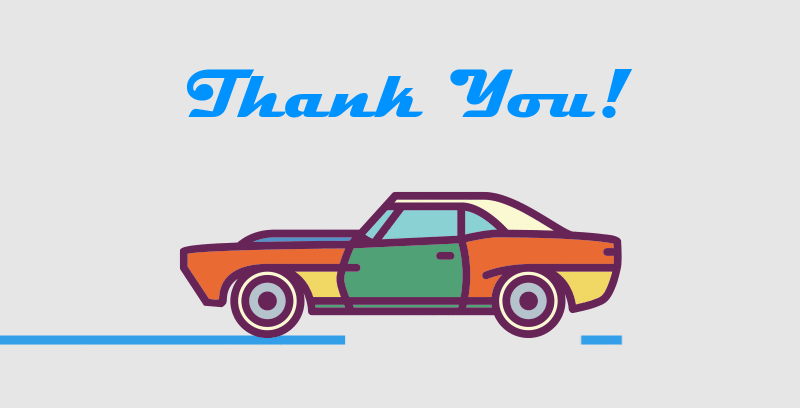